# Data 불러오기

In [191]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk
from sklearn.model_selection import train_test_split
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

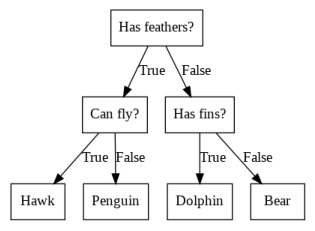

In [192]:
mglearn.plots.plot_animal_tree()

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [194]:
 cancer.data.shape[1]

30

In [195]:

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

print('Name of Features:\n',cancer.feature_names,'\n\nNumber of Features:',len(cancer.feature_names),'\n\n')
print('Name of Targets :\n',cancer.target_names)


Name of Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Number of Features: 30 


Name of Targets :
 ['malignant' 'benign']


In [196]:
def feature_importance(model,dataset):
  d={}
  for i,x in zip(dataset.feature_names, model.feature_importances_):
       d[i]=x
  
  d=pd.DataFrame(d,index=[1])
  return d

def zoomin_tree(model):
  print("Tree의 leaves 개수 :",model.get_n_leaves())
  print("Tree의 depth : ",model.get_depth())
  print("Tree의 parameter 설정 :",model.get_params)
 
def plot_feature_importances(model):
  n_features=cancer.data.shape[1]
  plt.barh(np.arange(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature Importances",color='white',fontsize=12)
  plt.ylabel("Features",color='white',fontsize=12)
  plt.ylim(-1,n_features)
  plt.xticks(color='white',fontsize=12)
  plt.yticks(color='white',fontsize=12)
  



# Full Tree

In [197]:
full_tree=DecisionTreeClassifier(random_state=0,criterion='entropy')
full_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

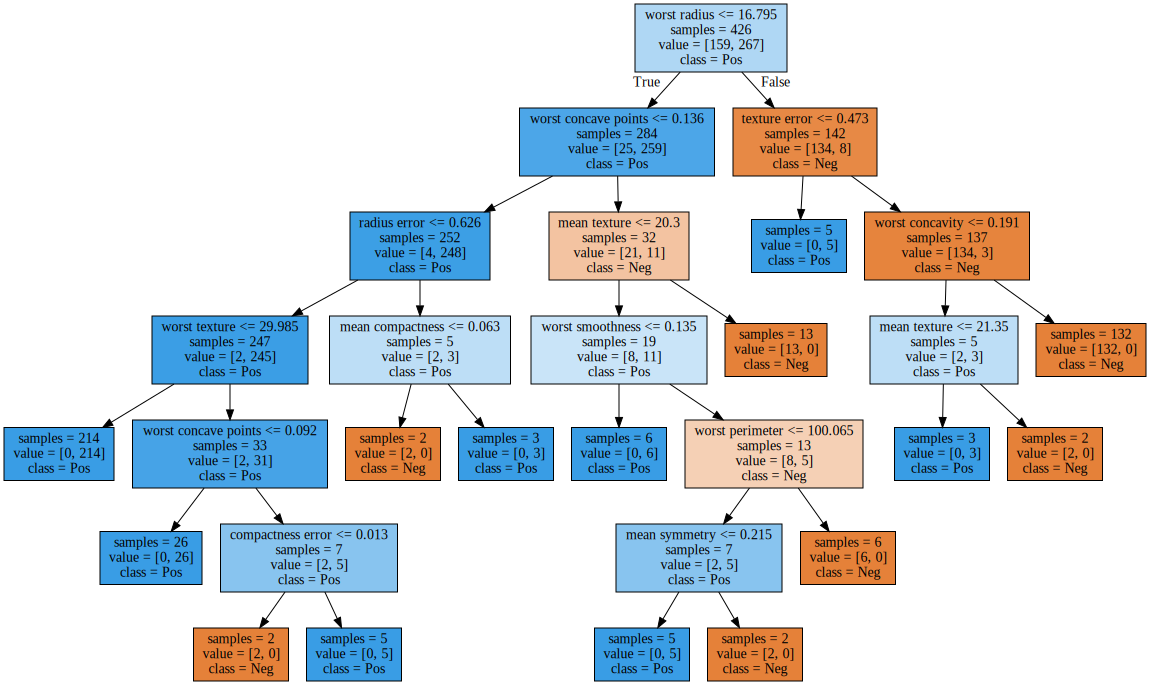

In [198]:
from sklearn.tree import export_graphviz
export_graphviz(full_tree, out_file="tree.dot",class_names=["Neg","Pos"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

Tree의 leaves 개수 : 15
Tree의 depth :  6
Tree의 parameter 설정 : <bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>


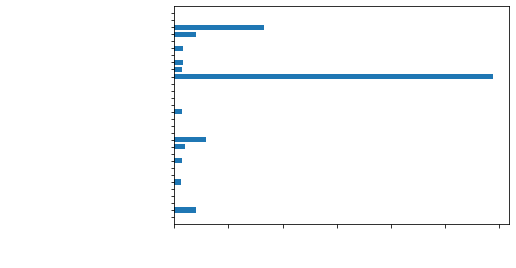

In [199]:
zoomin_tree(full_tree)
feature_importance(full_tree,cancer)
plot_feature_importances(full_tree)

In [200]:
print('훈련 세트 정확도 : %.3f'%full_tree.score(X_train,y_train)) #모두다 pure node로 만들어 버려서
print('테스트 세트 정확도 : %.3f'%full_tree.score(X_test,y_test))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.944


# Pruning : Depth

In [201]:
Dept4_tree=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=4)
Dept4_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

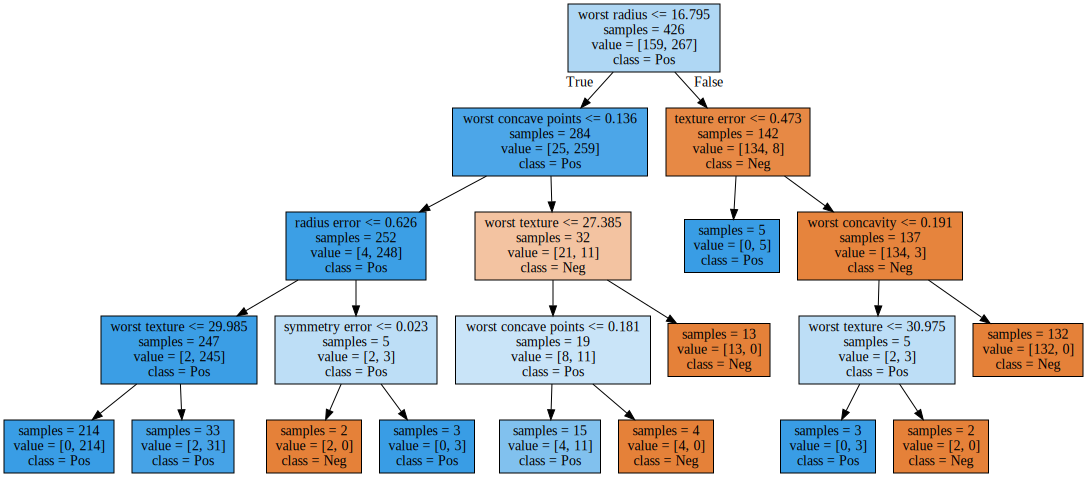

In [202]:
from sklearn.tree import export_graphviz
export_graphviz(Dept4_tree, out_file="Dept4 Tree.dot",class_names=["Neg","Pos"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("Dept4 Tree.dot") as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

Tree의 leaves 개수 : 11
Tree의 depth :  4
Tree의 parameter 설정 : <bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>


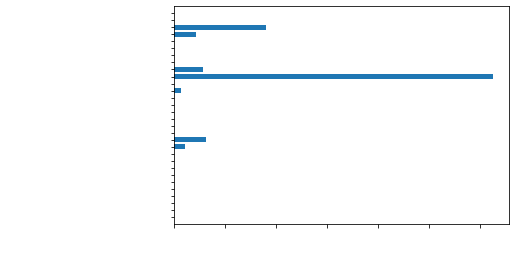

In [203]:
zoomin_tree(Dept4_tree)
feature_importance(Dept4_tree,cancer)
plot_feature_importances(Dept4_tree)

In [204]:
print('훈련 세트 정확도 : %.3f'%Dept4_tree.score(X_train,y_train)) #모두다 pure node로 만들어 버려서
print('테스트 세트 정확도 : %.3f'%Dept4_tree.score(X_test,y_test))

훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.958


Text(0.5, 1.0, 'Accuracy with respect to the number of depth in the Decision Tree')

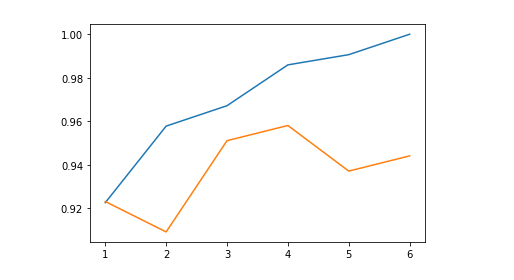

In [205]:
training_acc=[]
test_acc=[]
for i in np.arange(1,full_tree.get_depth() +1):
  tree=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=i)
  tree.fit(X_train,y_train)
  training_acc.append(tree.score(X_train,y_train))
  test_acc.append(tree.score(X_test,y_test))

plt.plot(np.arange(1,7),training_acc,label="Training Accuracy")
plt.plot(np.arange(1,7),test_acc,label="Test Accuracy")
plt.ylabel("Accuracy",color='white')
plt.xlabel("Number of Depth",color='white')
plt.title("Accuracy with respect to the number of depth in the Decision Tree",fontsize=15,color='white')

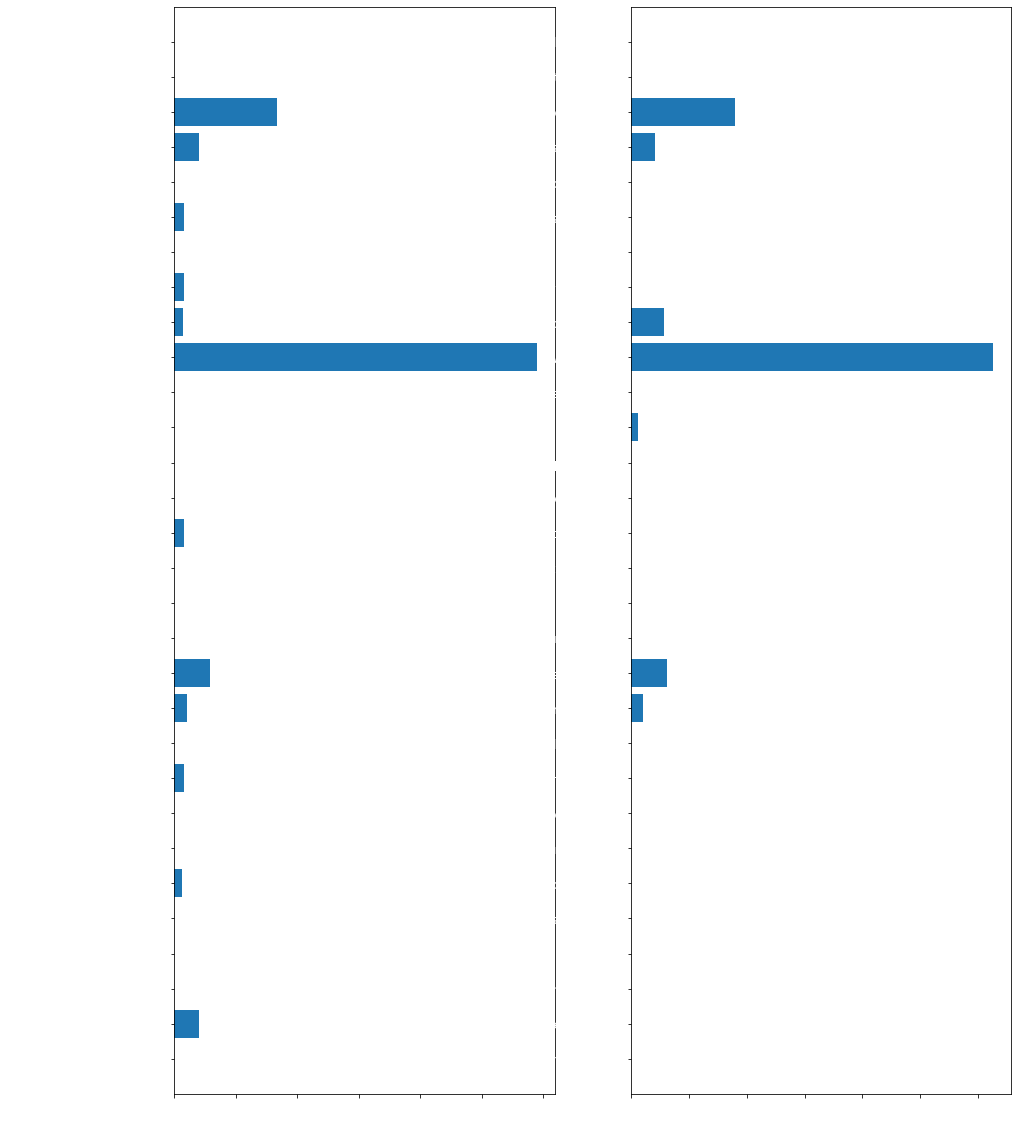

In [206]:
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plot_feature_importances(full_tree)
plt.subplot(1,2,2)
plot_feature_importances(Dept4_tree)

# Decisiontree Regressor : 훈련데이터 외의 범위 밖의 포인트에 대해서는 예측을 못함;;

In [207]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression

In [239]:
ram=pd.read_csv('/gdrive/My Drive/Colab Notebooks/Intro_ML/introduction_to_ml_with_python-master/introduction_to_ml_with_python-master/data/ram_price.csv')
ram

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [240]:
data_train=ram[ram.date<2000]
data_test=ram[ram.date>=2000]

In [241]:
X_train=data_train.date[:,np.newaxis]#차원을 늘리는거임 
y_train=np.log(data_train.price)

regtree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

In [242]:
X_all=ram.date[:,np.newaxis]

pred_tree=regtree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

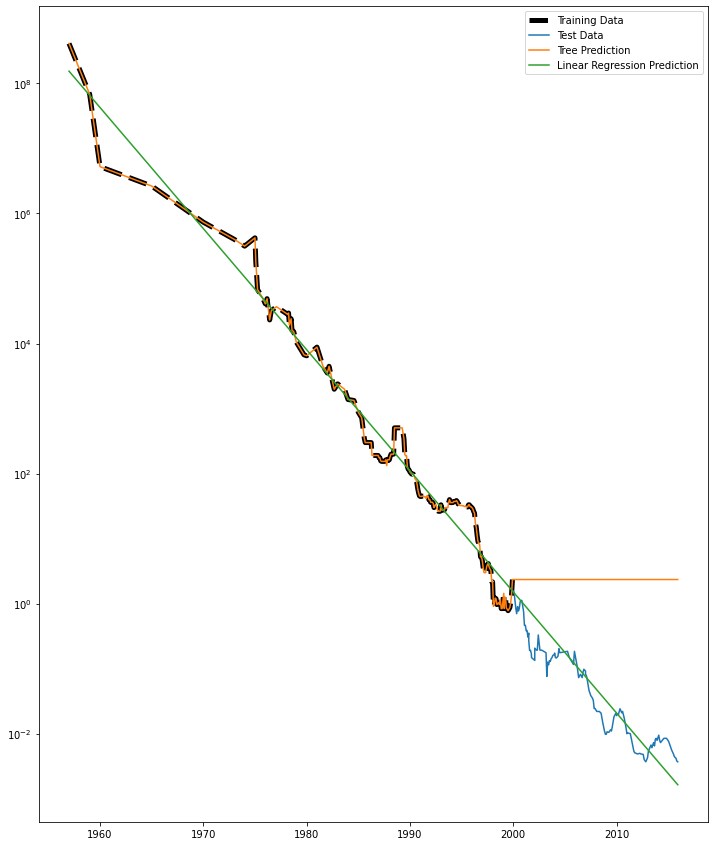

In [251]:
plt.figure(figsize=(12,15))
plt.semilogy(data_train.date,data_train.price,label="Training Data",linestyle="--",color='black',linewidth=5)
plt.semilogy(data_test.date,data_test.price,label="Test Data")
plt.semilogy(ram.date,price_tree,label="Tree Prediction")
plt.semilogy(ram.date,price_lr,label="Linear Regression Prediction")
plt.legend()